In [12]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [18]:
grid = np.linspace(1, 100, 100)
categorical = ['idFilial', 'KanalDB', 'idSubGrp']
score = list()
for j in grid:
    data = pd.read_csv('sample/train_set_weeks.csv', index_col='id')
    
    data = (data.merge(data.groupby(categorical, 
        as_index=False)['N wk'].max(), on=categorical))

    valid = data[data['N wk_x'] == data['N wk_y']]
    data = data[data['N wk_x'] != data['N wk_y']]
    
    data['N wk_x'] **= j
    data = data.merge(data.groupby(['idFilial', 'KanalDB', 'idSubGrp'])['N wk_x'].sum().
        rename('normalization').reset_index(), on=['idFilial', 'KanalDB', 'idSubGrp'])
    data['N wk_x'] /= data['normalization']
    data['value'] *= data['N wk_x']
    predict = data.groupby(['idFilial', 'KanalDB', 'idSubGrp'])['value'].sum().reset_index()

    valid = valid.merge(predict, on=['idFilial', 'KanalDB', 'idSubGrp'])
    score.append(np.sqrt(np.mean((valid['value_x'] - valid['value_y'])**2)))

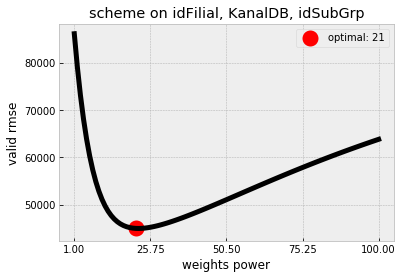

In [23]:
plt.style.use('bmh')
plt.plot(grid, score, color='k', lw=5)
plt.scatter(np.argmin(score), np.min(score), c='r', lw=10, label='optimal: 21')
plt.legend()
plt.xticks(np.linspace(1, 100, 5))
plt.title('scheme on idFilial, KanalDB, idSubGrp')
plt.xlabel('weights power')
plt.ylabel('valid rmse')
plt.savefig('weights.pdf')

In [24]:
np.min(score)

44987.534873719189

In [29]:
data = pd.read_csv('sample/train_set_weeks.csv', index_col='id')
data['N wk'] **= 8
data = data.merge(data.groupby(['idFilial', 'KanalDB', 'idSubGrp'])['N wk'].sum().
    rename('normalization').reset_index(), on=['idFilial', 'KanalDB', 'idSubGrp'])
data['N wk'] /= data['normalization']
data['value'] *= data['N wk']
predict = data.groupby(['idFilial', 'KanalDB', 'idSubGrp'])['value'].sum().reset_index()

In [30]:
test = pd.read_csv('sample/test_set_weeks.csv', index_col='id')
submit = test.merge(predict, on=['idFilial', 'KanalDB', 'idSubGrp'])
submit.index.name = 'id'
submit.to_csv('submit_smooth.csv')